In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load diagnostics

In [25]:
import xarray as xr
import matplotlib.pyplot as plt

In [26]:
gridname = 'natv' #   choose from ['natv', 'rho2', 'zstr']
dt = 'monthly' #       choose from ['monthly', 'daily', 'hourly']

In [27]:
# Load data on native grid
sim = "wmt_incsurffluxes.natv_rho2_zstr.monthly_daily_hourly.13months"
rootdir = f"/archive/Graeme.Macgilchrist/MOM6-examples/ice_ocean_SIS2/Baltic_OM4_025/{sim}/Baltic_OM4_025/"
prefix = '19000101.ocean_'+dt+'_' 
time = "190*"

# Diagnostics were saved into different files
suffixs = ['surf','thck','heat','salt','xtra']
Zprefixes = {'rho2':'rho2_', 'zstr':'z_', 'natv':'z'}
Zprefix = Zprefixes[gridname]
ds = xr.Dataset()
for suffix in suffixs:
    if suffix == "surf":
        filename = prefix+suffix+'_'+time+'.nc'
    else:
        filename = prefix+gridname+'_'+suffix+'_'+time+'.nc'
    dsnow = xr.open_mfdataset(rootdir+filename)
    ds = xr.merge([ds,dsnow])

### Load budget metadata

In [28]:
import xbudget
budget_dict = xbudget.load_preset_budget(model="MOM6")

In [29]:
import json
print(json.dumps(budget_dict["mass"], sort_keys=True, indent=4))

{
    "lambda": "density",
    "lhs": {
        "sum": {
            "Eulerian_tendency": {
                "product": {
                    "density": 1035.0,
                    "thickness": "dhdt"
                },
                "total": null
            }
        },
        "total": null
    },
    "rhs": {
        "sum": {
            "advection": {
                "sum": {
                    "horizontal": {
                        "product": {
                            "density": 1035.0,
                            "thickness": "dynamics_h_tendency"
                        },
                        "total": null
                    },
                    "vertical": {
                        "product": {
                            "density": 1035.0,
                            "thickness": "vert_remap_h_tendency"
                        },
                        "total": null
                    }
                },
                "total": null
            },
          

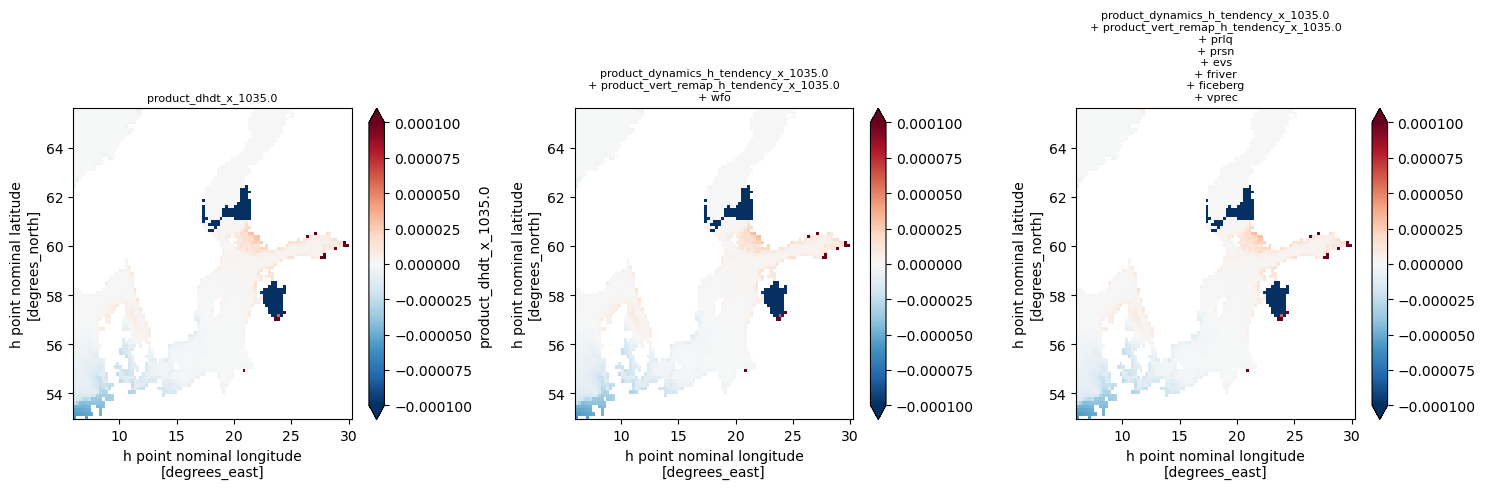

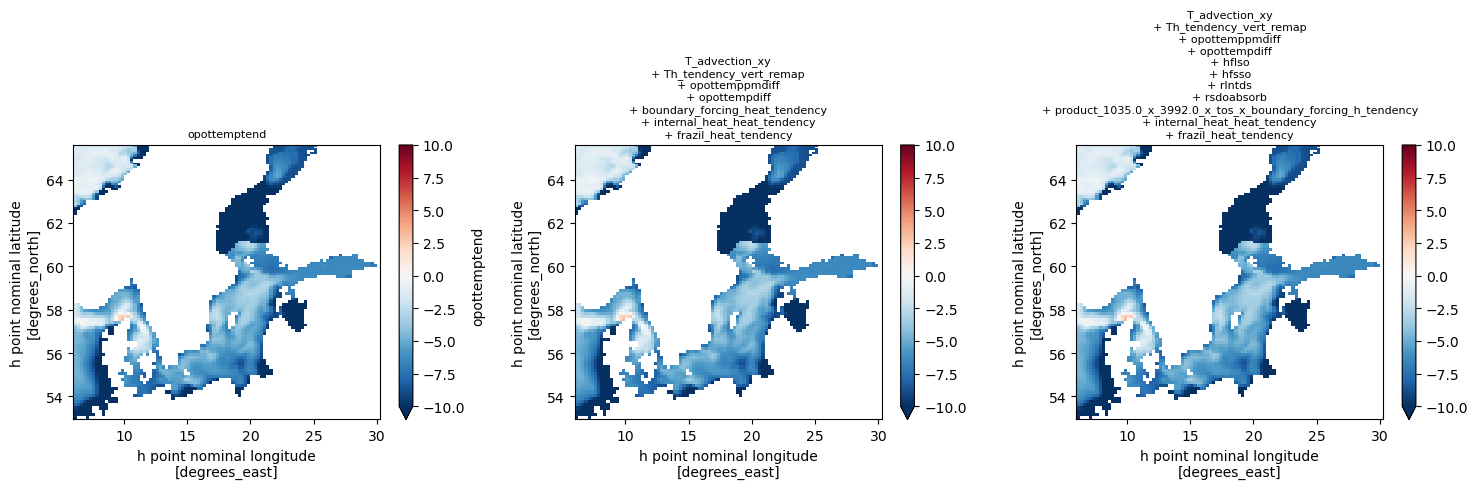

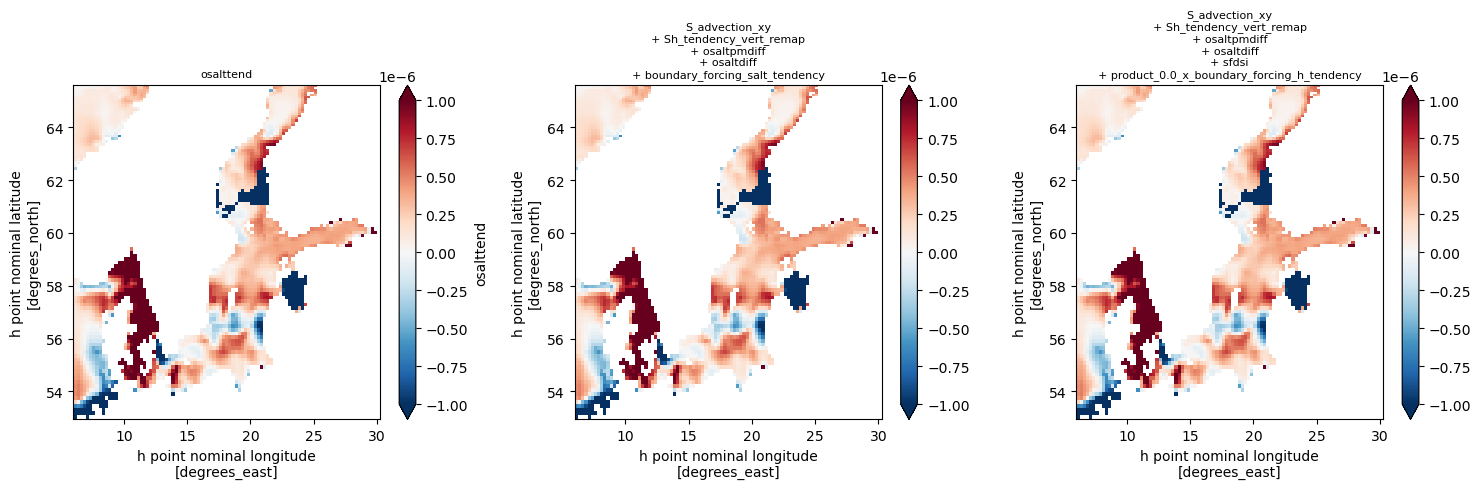

In [31]:
vmax = 1.e-4

for eq, vmax in zip(["mass", "heat", "salt"], [1.e-4, 10, 1.e-6]):
    plt.figure(figsize=(15, 5))

    plt.subplot(1,3,1)
    lhs_terms = xbudget.collect_terms(ds, budget_dict[eq]['lhs'])
    sum([ds[v] for v in lhs_terms]).isel(zl = 0).isel(time=0).plot(vmin=-vmax, vmax=vmax, cmap="RdBu_r")
    plt.title("\n+ ".join(lhs_terms), fontsize=8);

    plt.subplot(1,3,2)
    rhs_terms = xbudget.collect_terms(ds, budget_dict[eq]['rhs'], mode="shallow")
    sum([ds[v] for v in rhs_terms]).isel(zl = 0).isel(time=0).plot(vmin=-vmax, vmax=vmax, cmap="RdBu_r")
    plt.title("\n+ ".join(rhs_terms), fontsize=8);

    plt.subplot(1,3,3)
    rhs_terms = xbudget.collect_terms(ds, budget_dict[eq]['rhs'], mode="deep")
    sum([ds[v] for v in rhs_terms]).isel(zl = 0).isel(time=0).plot(vmin=-vmax, vmax=vmax, cmap="RdBu_r")
    plt.title("\n+ ".join(rhs_terms), fontsize=8);

    plt.tight_layout()